In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [62]:
df= pd.read_csv('books.csv',error_bad_lines=False)
df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [6]:
df.shape

(11123, 12)

<AxesSubplot:xlabel='average_rating', ylabel='title'>

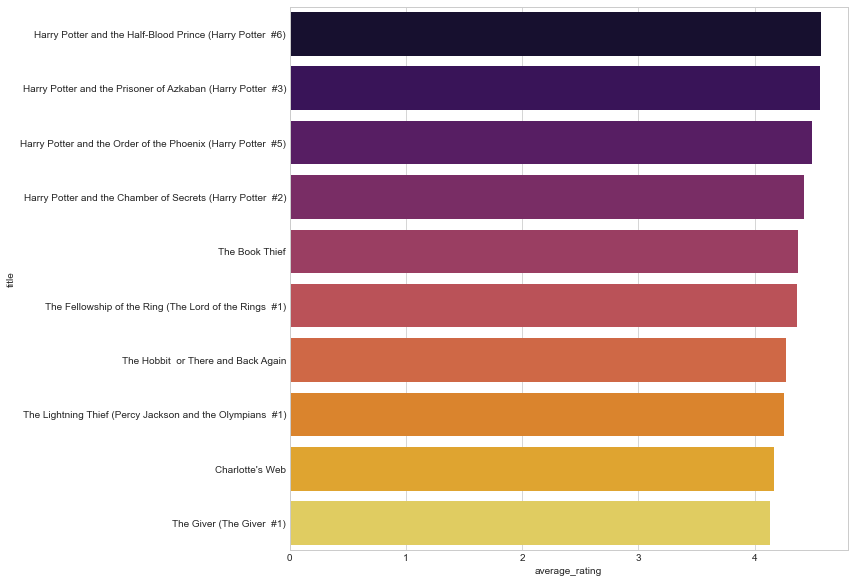

In [7]:
top_ten = df[df['ratings_count']>1000000]
data = top_ten.sort_values(by='average_rating',ascending=False).head(10)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10))
sns.barplot(x="average_rating",y="title",data=data,palette="inferno")

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


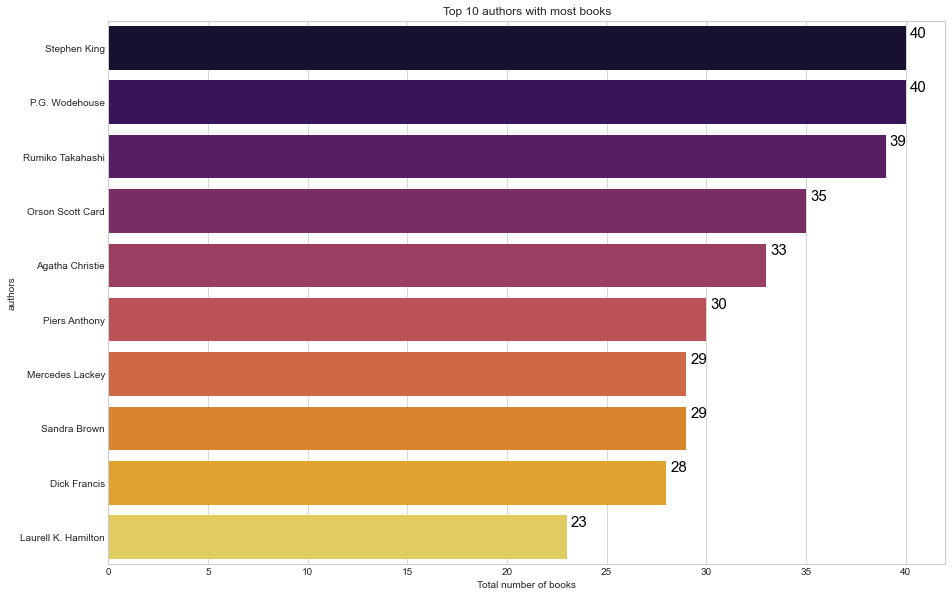

In [13]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')

plt.figure(figsize=(15,10))

ax = sns.barplot(most_books['title'],most_books.index,palette='inferno')

ax.set_title('Top 10 authors with most books')

ax.set_xlabel("Total number of books")

totals=[]



for i in ax.patches:
    totals.append(i.get_y())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
    
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


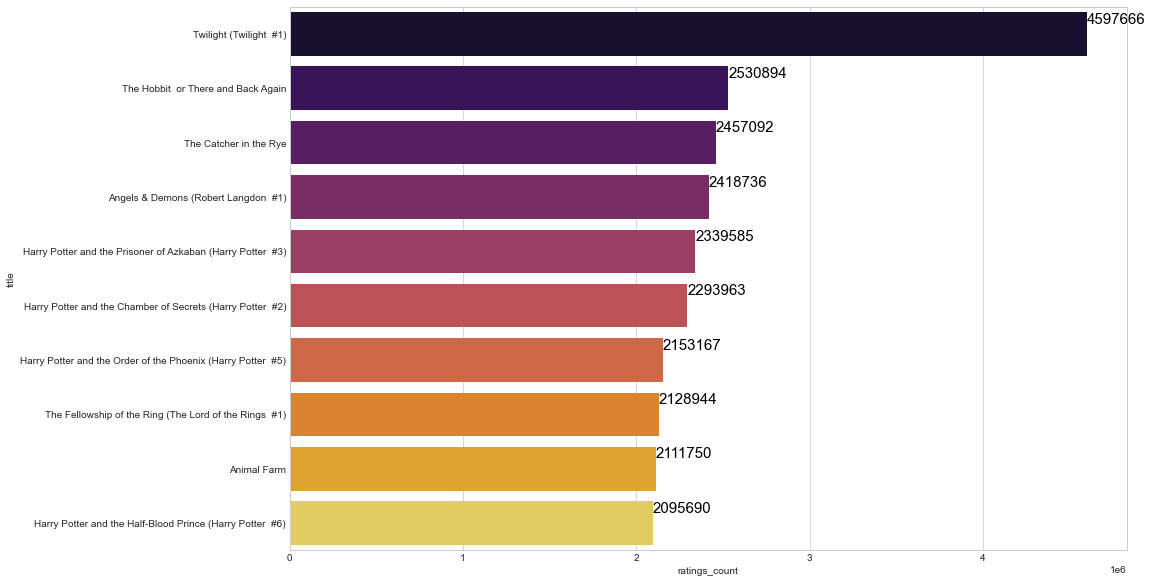

In [14]:
most_rated = df.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_rated['ratings_count'],most_rated.index,palette='inferno')
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.2,i.get_y()+.2,str(round(i.get_width())),fontsize=15,color='black')
    
plt.show()    

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

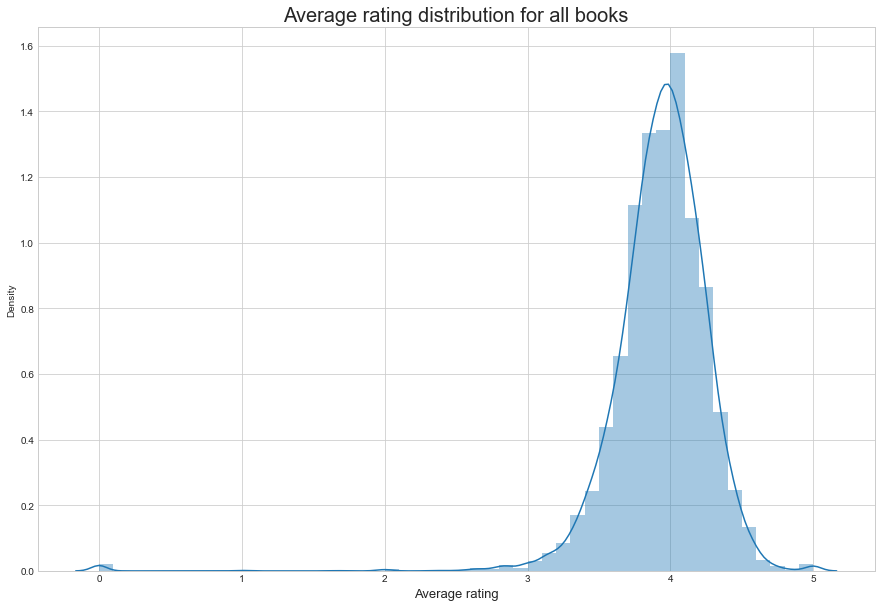

In [15]:
df.average_rating = df.average_rating.astype(float)
fig,ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

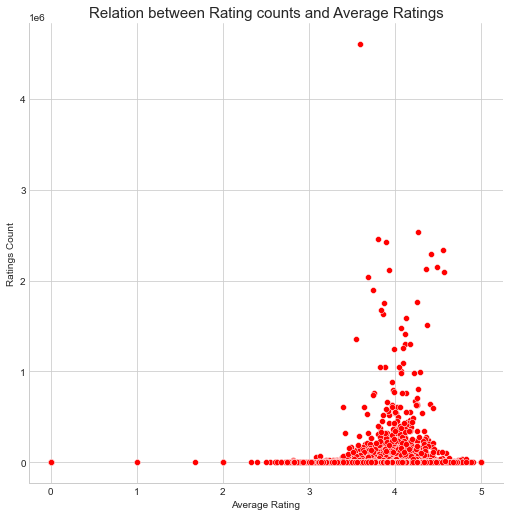

In [16]:
ax = sns.relplot(data=df,x="average_rating",y="ratings_count",color='red',sizes=(100,200),height=7,marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize=15)
ax.set_axis_labels("Average Rating","Ratings Count")

<Figure size 1080x720 with 0 Axes>

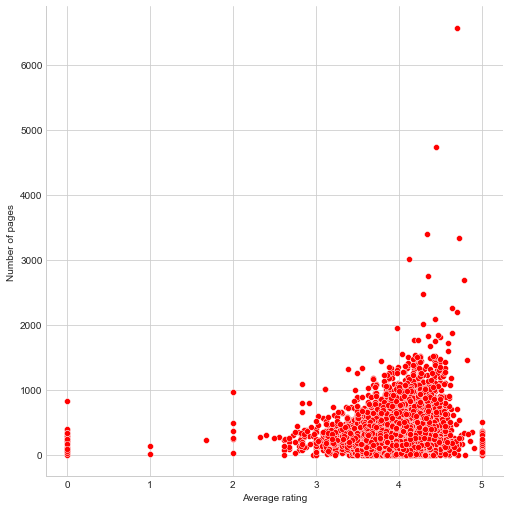

In [20]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y ="  num_pages",data=df,color='red',sizes=(100,200),height=7,marker='o')
ax.set_axis_labels('Average rating','Number of pages')

In [63]:
df2 = df.copy()

In [64]:
# df.loc adds a new column 'rating_between'.To all the rows which satisfies the condition,new value will be added to that specific row and 'rating_between' column 
df2.loc[(df2['average_rating']>=0) & (df2['average_rating']<=1),'rating_between'] ="between 0 and 1"
df2.loc[(df2['average_rating']>1) & (df2['average_rating']<=2),'rating_between'] ="between 1 and 2"
df2.loc[(df2['average_rating']>2) & (df2['average_rating']<=3),'rating_between'] ="between 2 and 3"
df2.loc[(df2['average_rating']>3) & (df2['average_rating']<=4),'rating_between'] ="between 3 and 4"
df2.loc[(df2['average_rating']>4) & (df2['average_rating']<=5),'rating_between'] ="between 4 and 5"

In [49]:
df2

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,between 4 and 5
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,between 4 and 5
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,between 3 and 4
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,between 3 and 4


In [65]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [66]:
features = pd.concat([rating_df,language_df,df2['average_rating'],df2['ratings_count']],axis=1)

In [67]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [68]:
# neighbors.NearestNeighbors is a Unsupervised learner for implementing neighbor searches.
# Here ball_tree Algorithm is used to compute the nearest neighbors. Other algos are KDtree, brute-force search 
model = neighbors.NearestNeighbors(n_neighbors=6,algorithm="ball_tree")

model.fit(features)

# model.kneighbors returns indices and distances of the neighbors
dist,idlist = model.kneighbors(features)
print(idlist) # idlist contains n neighbor's ids(index) for each book.
print(idlist.shape)
df2.shape

[[    0     1    23  4415     3  7309]
 [    1     0    23  4415     3  1697]
 [    2  2562  3101  3659  5486 10838]
 ...
 [11120  5459  8599  4325  5265  3664]
 [11121  1463  8854  7565  7079  5740]
 [11122  6343 10297  2646 11031  8250]]
(11123, 6)


(11123, 13)

In [71]:
def BookRecommender(book_name):
    book_list_name=[]
    book_id = df2[df2['title']==book_name].index # fetch the index of the book for which recommendations is required
    book_id = book_id[0] # first value is the index
    for newid in idlist[book_id]: # loop the book_id th array from idlist ex: for first book recommendations will be in first subarray of idlist
        book_list_name.append(df2.loc[newid].title) # fetch the title of each book using the index
    return book_list_name

BookNames = BookRecommender('The Book Thief')
BookNames

['The Book Thief',
 'The Giver (The Giver  #1)',
 'Jane Eyre',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'Little Women',
 "Charlotte's Web"]